In [155]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 4

# Downloading the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


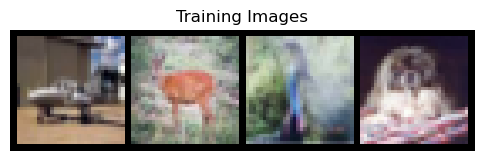

In [156]:
# Plotting trianing images

plt.figure(figsize=(6,6))

real_batch = next(iter(train_loader))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(0)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [157]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.ngpu = 1
        self.main = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 1),
            nn.Dropout(p=0.2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 1),
            nn.Dropout(p=0.2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),
            nn.BatchNorm2d(256),

            nn.Flatten(),
            nn.Softmax(dim=1),

        )

    def forward(self, x):
        return self.main(x)

net = Net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)
print(net)

Net(
  (main): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.2, inplace=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Softmax(dim=1)
  )
)


In [158]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [159]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 11.727
[1,  4000] loss: 11.723
[1,  6000] loss: 11.721
[1,  8000] loss: 11.720
[1, 10000] loss: 11.719
[1, 12000] loss: 11.719
[2,  2000] loss: 11.719
[2,  4000] loss: 11.718
[2,  6000] loss: 11.718
[2,  8000] loss: 11.717
[2, 10000] loss: 11.717
[2, 12000] loss: 11.717
[3,  2000] loss: 11.717
[3,  4000] loss: 11.717
[3,  6000] loss: 11.717
[3,  8000] loss: 11.717
[3, 10000] loss: 11.717
[3, 12000] loss: 11.715
[4,  2000] loss: 11.717
[4,  4000] loss: 11.716
[4,  6000] loss: 11.715
[4,  8000] loss: 11.716
[4, 10000] loss: 11.717
[4, 12000] loss: 11.715
[5,  2000] loss: 11.716
[5,  4000] loss: 11.715
[5,  6000] loss: 11.714
[5,  8000] loss: 11.715
[5, 10000] loss: 11.716
[5, 12000] loss: 11.715
Finished Training
